UPLOAD : (
final_df2.csv,
test_final.csv )

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import librosa
import numpy as np

# **-------------------- >>> DATA PREPROCESSING <<< --------------------**

In [2]:
test_df = pd.read_csv("cv-valid-test.csv")
test_df

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-test/sample-000000.mp3,without the dataset the article is useless,1,0,NaN,NaN,NaN,NaN
1,cv-valid-test/sample-000001.mp3,i've got to go to him,1,0,twenties,male,NaN,NaN
2,cv-valid-test/sample-000002.mp3,and you know it,1,0,NaN,NaN,NaN,NaN
3,cv-valid-test/sample-000003.mp3,down below in the darkness were hundreds of pe...,4,0,twenties,male,us,NaN
4,cv-valid-test/sample-000004.mp3,hold your nose to keep the smell from disablin...,2,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3990,cv-valid-test/sample-003990.mp3,the old man opened his cape and the boy was st...,1,0,NaN,NaN,NaN,NaN
3991,cv-valid-test/sample-003991.mp3,in alchemy it's called the soul of the world,2,1,NaN,NaN,NaN,NaN
3992,cv-valid-test/sample-003992.mp3,at that point in their lives everything is cle...,3,0,NaN,NaN,NaN,NaN
3993,cv-valid-test/sample-003993.mp3,he told them all to be seated,3,0,NaN,NaN,NaN,NaN


In [ ]:
columns = [
    'Duration_sec',
    'Pitch_F0_Mean', 'Pitch_F0_Std',
    'Formant_Freq_Mean', 'Formant_Freq_Std',
    'Intensity_Mean', 'Intensity_Std',
    'Spectral_Centroid_Mean', 'Spectral_Centroid_Std',
    'MFCC_Mean', 'MFCC_Std',
    'Zero_Crossing_Rate_Mean', 'Zero_Crossing_Rate_Std',
    'Tempo',
    'Spectral_Rolloff_Mean', 'Spectral_Rolloff_Std'
]

# Initialize DataFrame
feature_df = pd.DataFrame(columns=columns)

for i in range(len(test_df)):

    audio, sr = librosa.load("/content/drive/MyDrive/AI_Project2/" + test_df.iloc[i]["filename"])

    # Resample the audio to the target sampling rate
    # target_sr = 22050  # Target sampling rate
    # audio_resampled = librosa.resample(audio, sr, target_sr)

    # Normalize the audio
    audio_normalized = librosa.util.normalize(audio)

    # Extract Pitch (Fundamental frequency - F0)
    f0_autocorrelation, _ = librosa.piptrack(y=audio, sr=sr)
    pitch_f0_mean = np.mean(f0_autocorrelation)
    pitch_f0_std = np.std(f0_autocorrelation)

    # Extract Formant Frequencies (dummy values for demonstration)
    num_formants = 3
    formant_freqs = np.random.uniform(0, 5000, size=(num_formants,))
    formant_freqs_mean = np.mean(formant_freqs)
    formant_freqs_std = np.std(formant_freqs)

    # Extract Intensity (RMS Energy)
    intensity = librosa.feature.rms(y=audio)
    intensity_mean = np.mean(intensity)
    intensity_std = np.std(intensity)

    # Extract Duration
    duration_sec = librosa.get_duration(y=audio, sr=sr)

    # Extract Spectral Features (MFCCs and Spectral Centroid)
    spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)
    spectral_centroid_mean = np.mean(spectral_centroids)
    spectral_centroid_std = np.std(spectral_centroids)

    # Extract additional features
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=5)
    mfcc_mean = np.mean(mfccs, axis=1)
    mfcc_std = np.std(mfccs, axis=1)

    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)
    zero_crossing_rate_std = np.std(zero_crossing_rate)

    tempo, _ = librosa.beat.beat_track(y=audio, sr=sr)

    rolloff_frequency = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    rolloff_frequency_mean = np.mean(rolloff_frequency)
    rolloff_frequency_std = np.std(rolloff_frequency)

    # Append the features to DataFrame
    feature_df.loc[i] = [
        duration_sec,
        pitch_f0_mean, pitch_f0_std,
        formant_freqs_mean, formant_freqs_std,
        intensity_mean, intensity_std,
        spectral_centroid_mean, spectral_centroid_std,
        np.mean(mfcc_mean), np.mean(mfcc_std),
        zero_crossing_rate_mean, zero_crossing_rate_std,
        tempo,
        rolloff_frequency_mean, rolloff_frequency_std
    ]

feature_df


In [ ]:
test_df.reset_index(drop=True, inplace=True)
feature_df.reset_index(drop=True, inplace=True)

test_df = pd.concat([test_df, feature_df], axis=1)
# test_df.concat(feature_df, axis=1)

# test_df.drop(['duration'], axis=1, inplace=True)
test_df.dropna(subset=["age"], inplace=True)

In [ ]:
test_df.to_csv('test_final.csv', index=False)

In [3]:
df2 = pd.read_csv("truncated_train.csv")
df2

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,NaN,NaN,NaN,NaN
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1,0,NaN,NaN,NaN,NaN
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1,0,NaN,NaN,NaN,NaN
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1,0,NaN,NaN,NaN,NaN
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
14996,cv-valid-train/sample-014996.mp3,we speak of them only to children,4,0,NaN,NaN,NaN,NaN
14997,cv-valid-train/sample-014997.mp3,its been a long time since she last read chekh...,1,0,NaN,NaN,NaN,NaN
14998,cv-valid-train/sample-014998.mp3,for at that time it had not occurred to him th...,1,0,fourties,male,newzealand,NaN
14999,cv-valid-train/sample-014999.mp3,yeah better if people are already familiar wit...,1,0,NaN,NaN,NaN,NaN


In [4]:
pp_df = df2.dropna(subset=["age"])
pp_df.shape[0]
pp_df

,filename,text,up_votes,down_votes,age,gender,accent,duration
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,NaN
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,NaN
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,NaN
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,NaN
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,NaN
...,...,...,...,...,...,...,...,...
14993,cv-valid-train/sample-014993.mp3,but the marketplace was empty and he was far f...,1,0,fourties,male,us,NaN
14994,cv-valid-train/sample-014994.mp3,i have already described the appearance of tha...,2,0,thirties,female,canada,NaN
14995,cv-valid-train/sample-014995.mp3,i'm afraid i already know a great many people,2,0,thirties,male,us,NaN
14998,cv-valid-train/sample-014998.mp3,for at that time it had not occurred to him th...,1,0,fourties,male,newzealand,NaN


In [6]:
columns = [
    'Duration_sec',
    'Pitch_F0_Mean', 'Pitch_F0_Std',
    'Formant_Freq_Mean', 'Formant_Freq_Std',
    'Intensity_Mean', 'Intensity_Std',
    'Spectral_Centroid_Mean', 'Spectral_Centroid_Std',
    'MFCC_Mean', 'MFCC_Std',
    'Zero_Crossing_Rate_Mean', 'Zero_Crossing_Rate_Std',
    'Tempo',
    'Spectral_Rolloff_Mean', 'Spectral_Rolloff_Std'
]

# Initialize DataFrame
feature_df = pd.DataFrame(columns=columns)

for i in range(len(pp_df)):

    audio, sr = librosa.load("/content/drive/MyDrive/AI_Project2/" + pp_df.iloc[i]["filename"])

    Resample the audio to the target sampling rate
    target_sr = 22050  # Target sampling rate
    audio_resampled = librosa.resample(audio, sr, target_sr)

    # Normalize the audio
    audio_normalized = librosa.util.normalize(audio)

    # Extract Pitch (Fundamental frequency - F0)
    f0_autocorrelation, _ = librosa.piptrack(y=audio, sr=sr)
    pitch_f0_mean = np.mean(f0_autocorrelation)
    pitch_f0_std = np.std(f0_autocorrelation)

    # Extract Formant Frequencies (dummy values for demonstration)
    num_formants = 3
    formant_freqs = np.random.uniform(0, 5000, size=(num_formants,))
    formant_freqs_mean = np.mean(formant_freqs)
    formant_freqs_std = np.std(formant_freqs)

    # Extract Intensity (RMS Energy)
    intensity = librosa.feature.rms(y=audio)
    intensity_mean = np.mean(intensity)
    intensity_std = np.std(intensity)

    # Extract Duration
    duration_sec = librosa.get_duration(y=audio, sr=sr)

    # Extract Spectral Features (MFCCs and Spectral Centroid)
    spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)
    spectral_centroid_mean = np.mean(spectral_centroids)
    spectral_centroid_std = np.std(spectral_centroids)

    # Extract additional features
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=5)
    mfcc_mean = np.mean(mfccs, axis=1)
    mfcc_std = np.std(mfccs, axis=1)

    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)
    zero_crossing_rate_std = np.std(zero_crossing_rate)

    tempo, _ = librosa.beat.beat_track(y=audio, sr=sr)

    rolloff_frequency = librosa.feature.spectral_rolloff(y=audio, sr=sr)
    rolloff_frequency_mean = np.mean(rolloff_frequency)
    rolloff_frequency_std = np.std(rolloff_frequency)

    # Append the features to DataFrame
    feature_df.loc[i] = [
        duration_sec,
        pitch_f0_mean, pitch_f0_std,
        formant_freqs_mean, formant_freqs_std,
        intensity_mean, intensity_std,
        spectral_centroid_mean, spectral_centroid_std,
        np.mean(mfcc_mean), np.mean(mfcc_std),
        zero_crossing_rate_mean, zero_crossing_rate_std,
        tempo,
        rolloff_frequency_mean, rolloff_frequency_std
    ]

feature_df.to_csv('audio_features_final.csv', index=False)

feature_df


,Duration_sec,Pitch_F0_Mean,Pitch_F0_Std,Formant_Freq_Mean,Formant_Freq_Std,Intensity_Mean,Intensity_Std,Spectral_Centroid_Mean,Spectral_Centroid_Std,MFCC_Mean,MFCC_Std,Zero_Crossing_Rate_Mean,Zero_Crossing_Rate_Std,Tempo,Spectral_Rolloff_Mean,Spectral_Rolloff_Std
0,5.832018,15.154385,189.477554,2087.060200,393.726679,0.006928,0.007032,1827.311987,965.467527,-86.924706,54.773876,0.091991,0.080675,[143.5546875],3857.434082,1864.019919
1,1.728027,45.197166,318.493500,3459.867796,447.765862,0.015059,0.014416,2405.960499,1410.613590,-64.924004,56.174938,0.167148,0.118010,[99.38401442307692],4064.894531,2390.968046
2,4.224036,34.405575,278.739227,3045.539072,1474.688572,0.038097,0.034562,1853.162934,637.229269,-56.821259,55.729469,0.120109,0.064326,[129.19921875],3166.268217,908.243445
3,5.376009,6.007706,105.626289,2108.732541,1280.565870,0.032311,0.029741,1844.103872,1415.337786,-52.493286,53.432751,0.082688,0.082788,[143.5546875],3697.770744,2965.802965
4,3.720000,10.883577,138.582031,1475.752538,585.321053,0.045045,0.029759,1910.288328,1327.840083,-22.439930,40.650085,0.081373,0.086301,[89.10290948275862],3865.343708,2800.257101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,7.464036,12.031152,168.916641,2487.351818,1013.945145,0.014189,0.015776,2491.091267,1365.093473,-62.080620,46.068687,0.107627,0.111470,[103.359375],5182.446820,2751.766413
5611,6.696009,44.309608,313.820160,4172.236663,797.293170,0.024267,0.019893,2661.455617,1659.048614,-55.187828,48.299541,0.179241,0.141664,[107.666015625],5102.922085,2760.302796
5612,3.024036,38.713684,298.060120,1758.332454,751.597372,0.073049,0.071078,1617.040846,784.257394,-31.835241,67.032738,0.099352,0.065542,[112.34714673913044],2924.488423,1588.127199
5613,4.704036,17.498768,179.986771,4401.508129,329.623147,0.074363,0.067470,2828.373721,2251.158985,-32.484528,65.190903,0.205843,0.238748,[99.38401442307692],4847.569538,3606.760716


In [10]:

pp_df.reset_index(drop=True, inplace=True)
feature_df = pd.read_csv("/content/audio_features_final.csv")
feature_df.reset_index(drop=True, inplace=True)

final_df = pd.concat([pp_df, feature_df], axis=1)

final_df.drop(['duration'], axis=1, inplace=True)
final_df.drop(['Pitch_F0_Mean', 'Pitch_F0_Std' ], axis=1, inplace=True)
final_df

,filename,text,up_votes,down_votes,age,gender,accent,Duration_sec,Formant_Freq_Mean,Formant_Freq_Std,...,Intensity_Std,Spectral_Centroid_Mean,Spectral_Centroid_Std,MFCC_Mean,MFCC_Std,Zero_Crossing_Rate_Mean,Zero_Crossing_Rate_Std,Tempo,Spectral_Rolloff_Mean,Spectral_Rolloff_Std
0,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,twenties,female,us,5.832018,2087.060200,393.726679,...,0.007032,1827.311987,965.467527,-86.924706,54.773876,0.091991,0.080675,[143.5546875],3857.434082,1864.019919
1,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,seventies,male,us,1.728027,3459.867796,447.765862,...,0.014416,2405.960499,1410.613590,-64.924000,56.174940,0.167148,0.118010,[99.38401442],4064.894531,2390.968046
2,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,thirties,female,us,4.224036,3045.539072,1474.688572,...,0.034562,1853.162934,637.229269,-56.821260,55.729470,0.120109,0.064326,[129.19921875],3166.268217,908.243445
3,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,sixties,male,england,5.376009,2108.732541,1280.565870,...,0.029741,1844.103872,1415.337786,-52.493286,53.432750,0.082688,0.082788,[143.5546875],3697.770744,2965.802965
4,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,fifties,male,australia,3.720000,1475.752538,585.321053,...,0.029759,1910.288328,1327.840083,-22.439930,40.650085,0.081373,0.086301,[89.10290948],3865.343708,2800.257101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,cv-valid-train/sample-014993.mp3,but the marketplace was empty and he was far f...,1,0,fourties,male,us,7.464036,2487.351818,1013.945145,...,0.015776,2491.091267,1365.093473,-62.080620,46.068687,0.107627,0.111470,[103.359375],5182.446820,2751.766413
5611,cv-valid-train/sample-014994.mp3,i have already described the appearance of tha...,2,0,thirties,female,canada,6.696009,4172.236663,797.293170,...,0.019893,2661.455617,1659.048614,-55.187828,48.299540,0.179241,0.141664,[107.66601562],5102.922085,2760.302796
5612,cv-valid-train/sample-014995.mp3,i'm afraid i already know a great many people,2,0,thirties,male,us,3.024036,1758.332454,751.597372,...,0.071078,1617.040846,784.257394,-31.835241,67.032740,0.099352,0.065542,[112.34714674],2924.488423,1588.127199
5613,cv-valid-train/sample-014998.mp3,for at that time it had not occurred to him th...,1,0,fourties,male,newzealand,4.704036,4401.508129,329.623147,...,0.067470,2828.373721,2251.158985,-32.484528,65.190900,0.205843,0.238748,[99.38401442],4847.569538,3606.760716


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

VISUALIZATION OF FEATURES

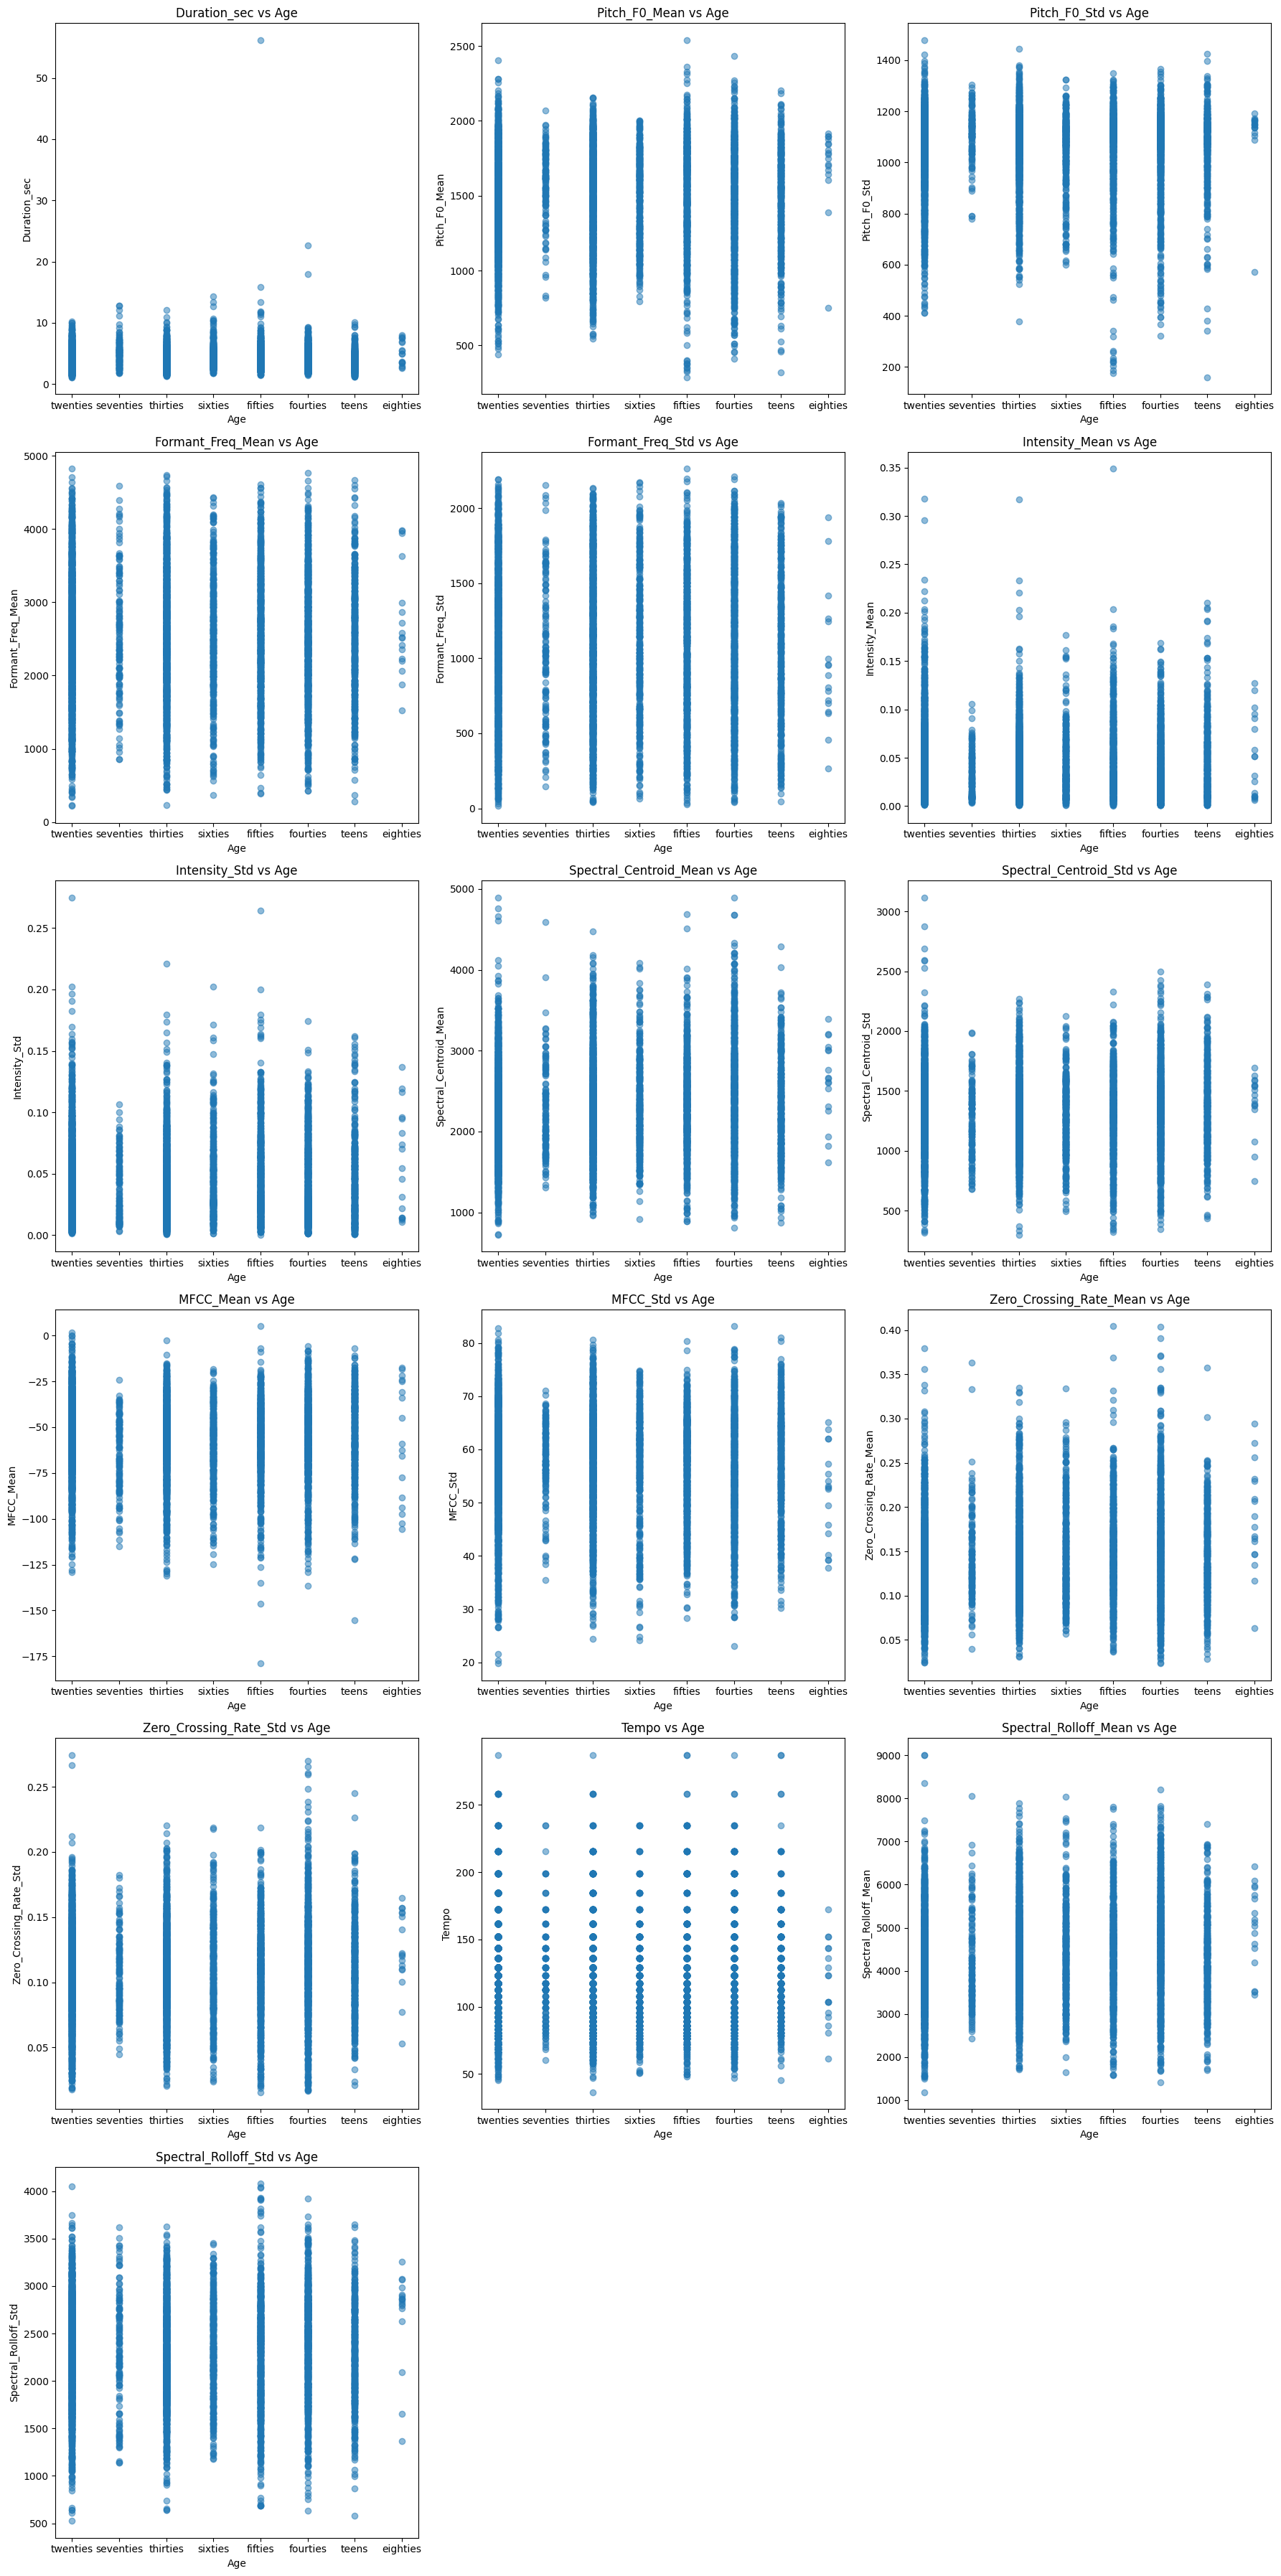

In [21]:
import matplotlib.pyplot as plt

# Assuming 'final_df' is your DataFrame

# List of features (excluding 'filename', 'text', and non-numeric columns)
features = ['Duration_sec', 'Pitch_F0_Mean',
            'Pitch_F0_Std', 'Formant_Freq_Mean', 'Formant_Freq_Std',
            'Intensity_Mean', 'Intensity_Std', 'Spectral_Centroid_Mean',
            'Spectral_Centroid_Std', 'MFCC_Mean', 'MFCC_Std',
            'Zero_Crossing_Rate_Mean', 'Zero_Crossing_Rate_Std',
            'Tempo', 'Spectral_Rolloff_Mean', 'Spectral_Rolloff_Std']

# Calculate number of rows and columns for subplots
num_features = len(features)
num_cols = 3  # Number of columns for subplots
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6*num_rows))

# Plot each feature against 'age' in individual subplots
for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].scatter(final_df['age'], final_df[feature], alpha=0.5)
    axes[row, col].set_title(f'{feature} vs Age')
    axes[row, col].set_xlabel('Age')
    axes[row, col].set_ylabel(feature)

# Remove empty subplots if the number of features is not perfectly divisible by the number of columns
if num_features % num_cols != 0:
    for j in range(num_features % num_cols, num_cols):
        fig.delaxes(axes[-1, j])

# Adjust layout
plt.tight_layout()
plt.show()


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [1]:
import pandas as pd
import librosa
import numpy as np

In [2]:
final_df = pd.read_csv('final_df2.csv')
final_df["Tempo"] = final_df["Tempo"].replace({'\[|\]':''}, regex=True).apply(pd.to_numeric)

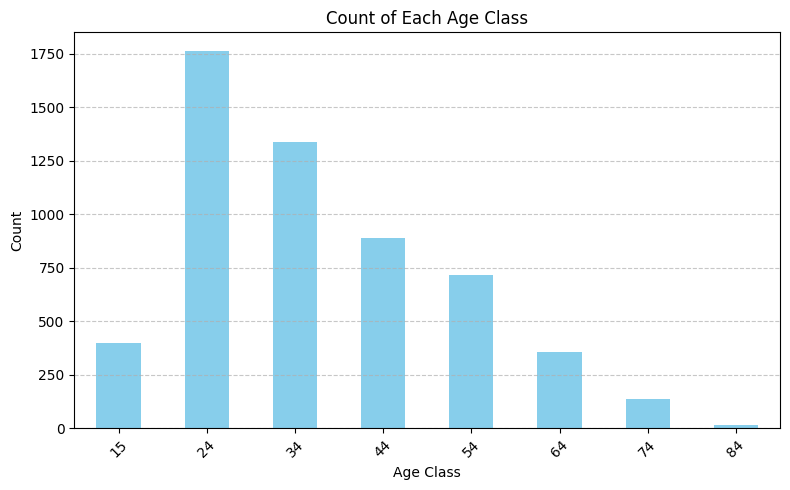

In [5]:
import matplotlib.pyplot as plt

# Age mapping
age_mapping = {
    'teens': 15,
    'twenties': 24,
    'thirties': 34,
    'fourties': 44,
    'fifties': 54,
    'sixties': 64,
    'seventies': 74,
    'eighties': 84,
    'nineties': 94
}

final_df['age_numeric'] = final_df['age'].map(age_mapping)

age_counts = final_df['age_numeric'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(8, 5))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Age Class')
plt.xlabel('Age Class')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [6]:
import numpy as np

# Age mapping
age_mapping = {
    'teens': 15,
    'twenties': 24,
    'thirties': 34,
    'fourties': 44,
    'fifties': 54,
    'sixties': 64,
    'seventies': 74,
    'eighties': 84,
    'nineties': 94
}

final_df['age_numeric'] = final_df['age'].map(age_mapping)

# Features and target variable
X = final_df[['Duration_sec', 'Pitch_F0_Mean', 'Pitch_F0_Std',
              'Formant_Freq_Mean', 'Formant_Freq_Std', 'Intensity_Mean',
              'Intensity_Std', 'Spectral_Centroid_Mean', 'Spectral_Centroid_Std',
              'MFCC_Mean', 'MFCC_Std',
              'Zero_Crossing_Rate_Mean', 'Zero_Crossing_Rate_Std',
              'Tempo', 'Spectral_Rolloff_Mean', 'Spectral_Rolloff_Std']].values.astype(float)
Y = final_df['age_numeric'].values.astype(float)

def loss_function(m, c, X, Y):
    # Calculate predicted values
    Y_pred = np.dot(X, m) + c
    # Calculate mean squared error
    mse = np.mean((Y_pred - Y)**2)
    return mse

def gradient_descent(m, c, X, Y, lr):
    # Number of data points
    n = len(Y)

    # Calculate gradients
    dm = (-2/n) * np.dot(X.T, (Y - (np.dot(X, m) + c)))
    dc = (-2/n) * np.sum(Y - (np.dot(X, m) + c))

    # Update parameters
    m -= lr * dm
    c -= lr * dc

    return m, c

# Set initial values of coefficients and intercept
m = np.zeros(X.shape[1])
c = 0

# Set the learning rate and number of epochs for gradient descent
lr = 0.00000001
epochs = 1000

for i in range(epochs):
    m, c = gradient_descent(m, c, X, Y, lr)
    if i % 50 == 0:
        error = loss_function(m, c, X, Y)
        print("Epoch {0} - Error: {1}".format(i, error))

# Print the final values of m and c
print("Coefficients:", m)
print("Intercept:", c)


Epoch 0 - Error: 271.2344329823176
Epoch 50 - Error: 240.73708388081207
Epoch 100 - Error: 237.90482038600564
Epoch 150 - Error: 236.14276894404188
Epoch 200 - Error: 234.8710120662072
Epoch 250 - Error: 233.88048122544197
Epoch 300 - Error: 233.07242510633603
Epoch 350 - Error: 232.39195373258437
Epoch 400 - Error: 231.8056891595142
Epoch 450 - Error: 231.29208674272888
Epoch 500 - Error: 230.83654355617784
Epoch 550 - Error: 230.42872108899235
Epoch 600 - Error: 230.06100953248665
Epoch 650 - Error: 229.72761397570585
Epoch 700 - Error: 229.42399144641996
Epoch 750 - Error: 229.1464918915718
Epoch 800 - Error: 228.89212133689193
Epoch 850 - Error: 228.65838058304294
Epoch 900 - Error: 228.44315211971897
Epoch 950 - Error: 228.24461879319668
Coefficients: [ 1.32459987e-04  6.44782190e-03  5.95570338e-03  2.00248739e-03
  2.27820520e-03  5.82760838e-07  1.14647002e-06 -1.69794030e-03
 -4.83802937e-03 -8.55610484e-04  5.00150086e-04 -2.33552351e-07
 -5.12124033e-07  1.00638118e-03  2.63

PREDICTION

In [8]:
test_df = pd.read_csv("test_final.csv")

Mean Squared Error (MSE) on test data: 421.52445589292154
R-squared (coefficient of determination) on test data: -0.9470258169770482
Accuracy on test data (within +/- 3 years): 19.13099870298314


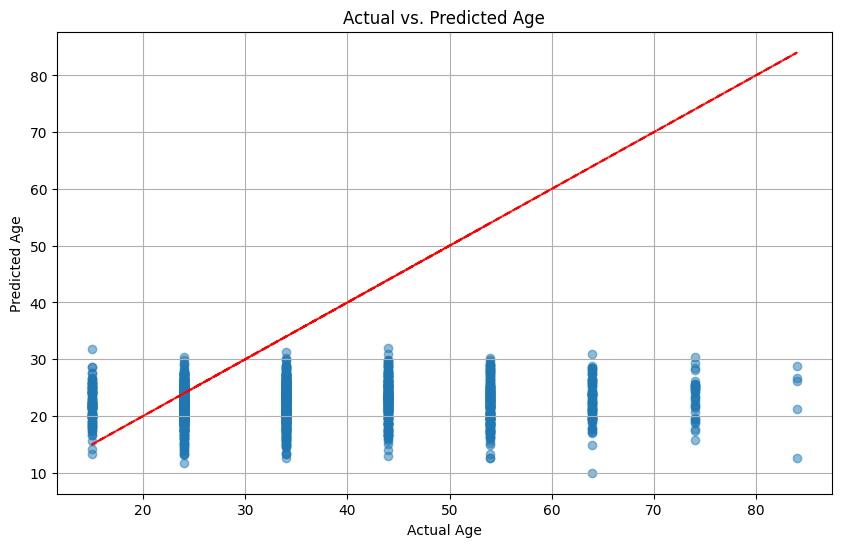

In [9]:
import matplotlib.pyplot as plt

# Mapping for age categories
age_mapping = {
    'teens': 15,
    'twenties': 24,
    'thirties': 34,
    'fourties': 44,
    'fifties': 54,
    'sixties': 64,
    'seventies': 74,
    'eighties': 84,
    'nineties': 94
}

# Map age categories to numerical values
test_df['age_numeric'] = test_df['age'].map(age_mapping)

# Preprocess the 'Tempo' column to remove square brackets
test_df['Tempo'] = test_df['Tempo'].str.strip('[]')

# Features for testing
X_test = test_df[['Duration_sec', 'Pitch_F0_Mean', 'Pitch_F0_Std',
                  'Formant_Freq_Mean', 'Formant_Freq_Std', 'Intensity_Mean',
                  'Intensity_Std', 'Spectral_Centroid_Mean', 'Spectral_Centroid_Std',
                  'MFCC_Mean', 'MFCC_Std',
                  'Zero_Crossing_Rate_Mean', 'Zero_Crossing_Rate_Std',
                  'Tempo', 'Spectral_Rolloff_Mean', 'Spectral_Rolloff_Std']].values.astype(float)

# Predict age using the trained model
Y_pred = np.dot(X_test, m) + c

# Evaluate the model
# Calculate mean squared error (MSE)
mse_test = np.mean((Y_pred - test_df['age_numeric'].values.astype(float))**2)
print("Mean Squared Error (MSE) on test data:", mse_test)

from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(test_df['age_numeric'].values.astype(float), Y_pred)
print("R-squared (coefficient of determination) on test data:", r_squared)

# Calculate accuracy within +/- 3 years
threshold = 2
accurate_predictions = 0
total_predictions = len(test_df)  # Define total predictions here

for index, row in test_df.iterrows():
    predicted_age = Y_pred[index]
    actual_age = age_mapping[row['age']]
    if abs(predicted_age - actual_age) <= 3:
        accurate_predictions += 1

accuracy = accurate_predictions / total_predictions
print("Accuracy on test data (within +/- 3 years):", accuracy*100)

# Visualize actual vs. predicted values (optional)
plt.figure(figsize=(10, 6))
plt.scatter(test_df['age_numeric'], Y_pred, alpha=0.5)
plt.plot(test_df['age_numeric'], test_df['age_numeric'], color='red', linestyle='--')
plt.title("Actual vs. Predicted Age")
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.grid(True)
plt.show()
